# Machine Learning for EDS assignment
## Imports
First we import the required libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

## Loading the data
We load the data into pandas DataFrames

In [3]:
train_df = pd.read_csv("data/data_banknote_authentication_train.csv")
test_df = pd.read_csv("data/data_banknote_authentication_test.csv")
val_df = pd.read_csv("data/data_banknote_authentication_val.csv")

## Ex.1: Exploring the data

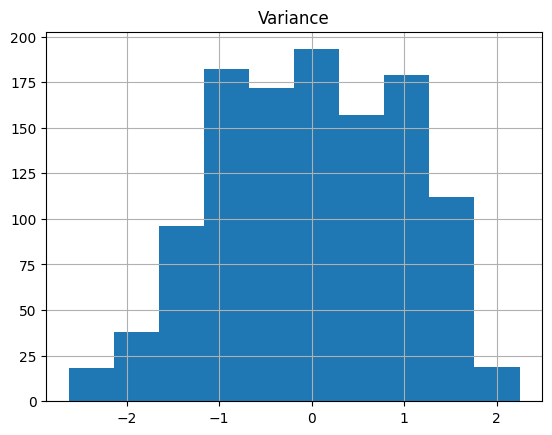

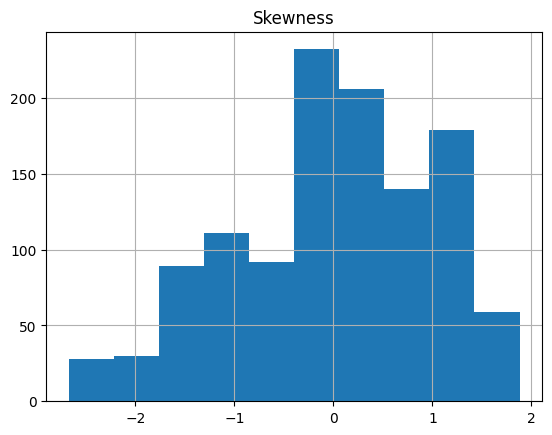

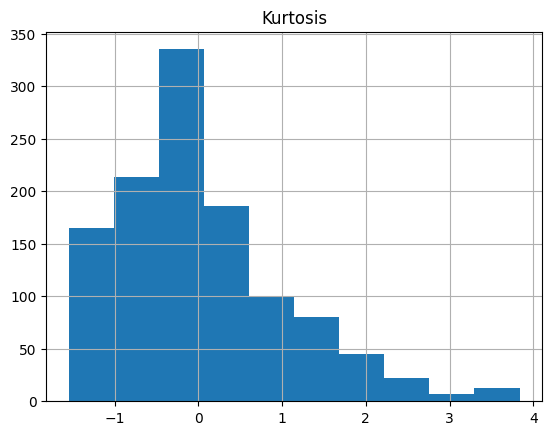

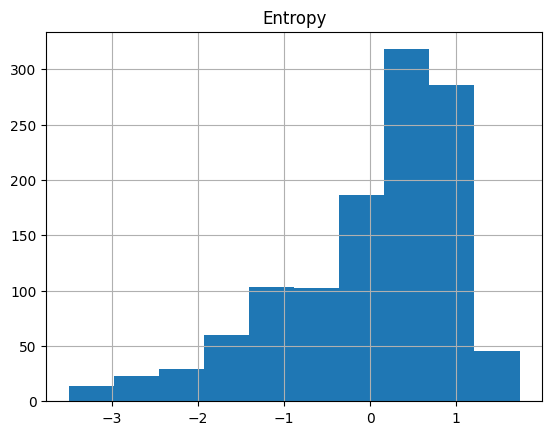

In [4]:
train_val_df = pd.concat([train_df, val_df])
train_val_df["variance"].hist()
plt.title("Variance")
plt.show()
train_val_df["skewness"].hist()
plt.title("Skewness")

plt.show()
train_val_df["kurtosis"].hist()
plt.title("Kurtosis")

plt.show()
train_val_df["entropy"].hist()
plt.title("Entropy")
plt.show()

## Ex 2. Linear SVM

Accuracy {'skewness', 'variance'}: 0.8689320388349514
Accuracy {'kurtosis', 'variance'}: 0.8203883495145631
Accuracy {'entropy', 'variance'}: 0.8543689320388349
Accuracy {'skewness', 'kurtosis'}: 0.7864077669902912
Accuracy {'skewness', 'entropy'}: 0.6990291262135923
Accuracy {'entropy', 'kurtosis'}: 0.6310679611650486


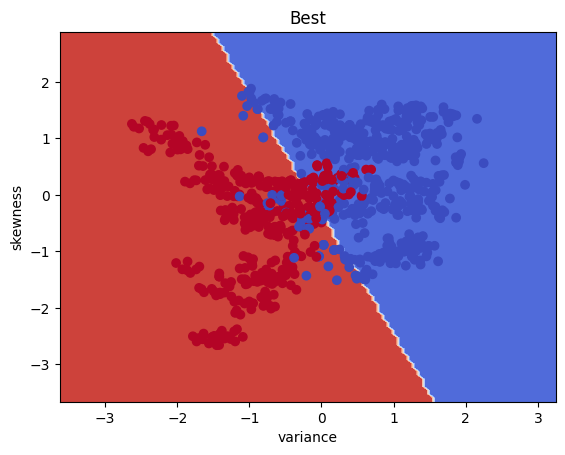

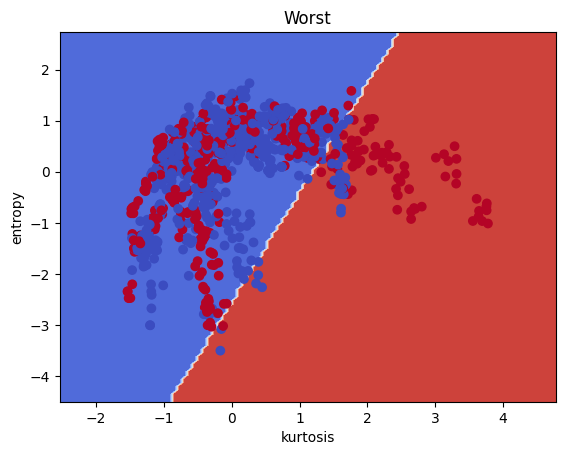

In [39]:
from itertools import combinations

features = ["variance", "skewness", "kurtosis", "entropy"]
models = []
model_accuracy = []
model_features = []

for f in combinations(features, 2):
    f = list(f)
    model_features.append(f)
    models.append(SVC(kernel='linear', C=1))
    models[-1].fit(train_df[f], train_df["class"])
    model_accuracy.append(models[-1].score(val_df[f], val_df["class"]))
    print(f'Accuracy {set(f)}: {model_accuracy[-1]}')

model_accuracy = np.array(model_accuracy)
model_accuracy.argmax(),model_accuracy.argmax()

DecisionBoundaryDisplay.from_estimator(models[model_accuracy.argmax()], train_df[model_features[model_accuracy.argmax()]], response_method="predict", cmap=plt.cm.coolwarm)
plt.scatter(train_df[model_features[model_accuracy.argmax()][0]], train_df[model_features[model_accuracy.argmax()][1]], c=train_df["class"], cmap=plt.cm.coolwarm)
plt.title("Best")
plt.show()

DecisionBoundaryDisplay.from_estimator(models[model_accuracy.argmin()], train_df[model_features[model_accuracy.argmin()]], response_method="predict", cmap=plt.cm.coolwarm)
plt.scatter(train_df[model_features[model_accuracy.argmin()][0]], train_df[model_features[model_accuracy.argmin()][1]], c=train_df["class"], cmap=plt.cm.coolwarm)
plt.title("Worst")
plt.show()

## Ex. 3: RBF Kernel

C: 0.0001, gamma: 0.001, accuracy: 0.5679611650485437
C: 0.01, gamma: 0.1, accuracy: 0.8640776699029126
C: 0.01, gamma: 1, accuracy: 0.9174757281553398
C: 1, gamma: 1, accuracy: 0.9223300970873787


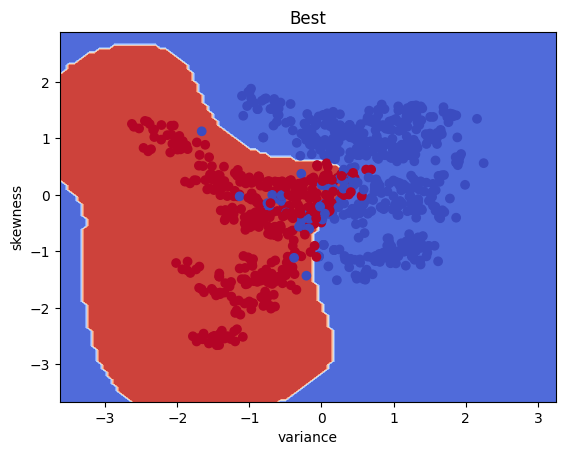

In [49]:
best_model = model_features[model_accuracy.argmax()]
best_model

C_options = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_options = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

rbf_models = []
rbf_model_accuracy = []
rbf_values = []
best = 0

for C in C_options:
    for gamma in gamma_options:
        rbf_values.append((C, gamma))
        rbf_models.append(SVC(kernel="rbf", C=C, gamma=gamma))
        rbf_models[-1].fit(train_df[best_model], train_df["class"])
        rbf_model_accuracy.append(rbf_models[-1].score(val_df[best_model], val_df["class"]))
        if rbf_model_accuracy[-1] > best:
            print(f"C: {C}, gamma: {gamma}, accuracy: {rbf_model_accuracy[-1]}")
            best = rbf_model_accuracy[-1]


rbf_model_accuracy = np.array(rbf_model_accuracy)
DecisionBoundaryDisplay.from_estimator(rbf_models[rbf_model_accuracy.argmax()], train_df[best_model], response_method="predict", cmap=plt.cm.coolwarm)
plt.scatter(train_df[best_model[0]], train_df[best_model[1]], c=train_df["class"], cmap=plt.cm.coolwarm)
plt.title("Best")
plt.show()

## Ex. 4: Overfitting?

SVC(C=1, gamma=0.001)
train accuracy: 0.88125
val accuracy: 0.8640776699029126
SVC(C=1, gamma=0.01)
train accuracy: 0.896875
val accuracy: 0.8689320388349514
SVC(C=1, gamma=0.1)
train accuracy: 0.9135416666666667
val accuracy: 0.9174757281553398
SVC(C=1, gamma=1)
train accuracy: 0.940625
val accuracy: 0.9223300970873787
SVC(C=1, gamma=10)
train accuracy: 0.9458333333333333
val accuracy: 0.9029126213592233
SVC(C=1, gamma=100)
train accuracy: 0.9770833333333333
val accuracy: 0.912621359223301
SVC(C=1, gamma=1000)
train accuracy: 0.9958333333333333
val accuracy: 0.7572815533980582


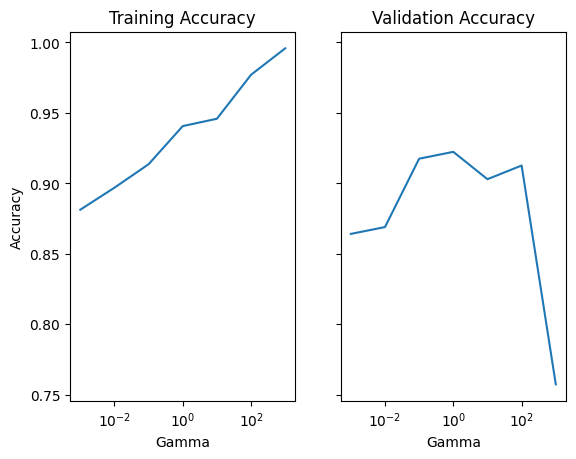

In [73]:
c_fixed_models = rbf_models[28:35]
c_fixed_values = [gamma for _, gamma in rbf_values[28:35]]
train_acc = []
val_acc = []

for m in c_fixed_models:
    print(m)
    train_acc.append(m.score(train_df[best_model], train_df["class"]))
    val_acc.append(m.score(val_df[best_model], val_df["class"]))
    print(f'train accuracy: {train_acc[-1]}')
    print(f'val accuracy: {val_acc[-1]}')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(c_fixed_values, train_acc)
ax1.set_xscale("log")
ax1.set_title("Training Accuracy")
ax1.set_xlabel("Gamma")
ax1.set_ylabel("Accuracy")
ax2.plot(c_fixed_values, val_acc)
ax2.set_xscale("log")
ax2.set_title("Validation Accuracy")
ax2.set_xlabel("Gamma")


plt.show()

For large values of gamma overfitting is clearly visible, because training accuracy increases but validation accuracy does not.